In [262]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('../input/train/train.csv', encoding='utf-8')
test = pd.read_csv('../input/test/test.csv', encoding='utf-8')
breeds = pd.read_csv('../input/breed_labels.csv')
colors = pd.read_csv('../input/color_labels.csv')
states = pd.read_csv('../input/state_labels.csv')

train = train.merge(breeds, how='left', left_on='Breed1', right_on='BreedID', suffixes=('', '_Breed1'))
train = train.merge(breeds, how='left', left_on='Breed2', right_on='BreedID', suffixes=('', '_Breed2'))
train = train.rename(columns={'BreedName': 'Breed1_Name', 'BreedName_Breed2': 'Breed2_Name'})
train = train.drop(['BreedID', 'BreedID_Breed2'], axis=1)

train = train.merge(colors, how='left', left_on='Color1', right_on='ColorID', suffixes=('', '_Color1'))
train = train.merge(colors, how='left', left_on='Color2', right_on='ColorID', suffixes=('', '_Color2'))
train = train.merge(colors, how='left', left_on='Color3', right_on='ColorID', suffixes=('', '_Color3'))
train = train.rename(columns={'ColorName':'Color1_Name', 'ColorName_Color2': 'Color2_Name', 'ColorName_Color3': 'Color3_Name'})
train = train.drop(['ColorID', 'ColorID_Color2', 'ColorID_Color3'], axis=1)

test = test.merge(breeds, how='left', left_on='Breed1', right_on='BreedID', suffixes=('', '_Breed1'))
test = test.merge(breeds, how='left', left_on='Breed2', right_on='BreedID', suffixes=('', '_Breed2'))
test = test.rename(columns={'BreedName': 'Breed1_Name', 'BreedName_Breed2': 'Breed2_Name'})
test = test.drop(['BreedID', 'BreedID_Breed2'], axis=1)

test = test.merge(colors, how='left', left_on='Color1', right_on='ColorID', suffixes=('', '_Color1'))
test = test.merge(colors, how='left', left_on='Color2', right_on='ColorID', suffixes=('', '_Color2'))
test = test.merge(colors, how='left', left_on='Color3', right_on='ColorID', suffixes=('', '_Color3'))
test = test.rename(columns={'ColorName':'Color1_Name', 'ColorName_Color2': 'Color2_Name', 'ColorName_Color3': 'Color3_Name'})
test = test.drop(['ColorID', 'ColorID_Color2', 'ColorID_Color3'], axis=1)

# train = train.merge(states, how='left', left_on='State', right_on='StateID')
# train = train.rename(columns={'StateName': 'State_Name'})
# train = train.drop(['StateID'], axis=1)

train['dataset_type'] = 'train'
test['dataset_type'] = 'test'
data = pd.concat([train, test])

data.shape

(18965, 32)

In [263]:
data.columns

Index(['Type', 'Name', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'RescuerID',
       'VideoAmt', 'Description', 'PetID', 'PhotoAmt', 'AdoptionSpeed',
       'Type_Breed1', 'Breed1_Name', 'Type_Breed2', 'Breed2_Name',
       'Color1_Name', 'Color2_Name', 'Color3_Name', 'dataset_type'],
      dtype='object')

In [264]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18965 entries, 0 to 3971
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           18965 non-null  int64  
 1   Name           17286 non-null  object 
 2   Age            18965 non-null  int64  
 3   Breed1         18965 non-null  int64  
 4   Breed2         18965 non-null  int64  
 5   Gender         18965 non-null  int64  
 6   Color1         18965 non-null  int64  
 7   Color2         18965 non-null  int64  
 8   Color3         18965 non-null  int64  
 9   MaturitySize   18965 non-null  int64  
 10  FurLength      18965 non-null  int64  
 11  Vaccinated     18965 non-null  int64  
 12  Dewormed       18965 non-null  int64  
 13  Sterilized     18965 non-null  int64  
 14  Health         18965 non-null  int64  
 15  Quantity       18965 non-null  int64  
 16  Fee            18965 non-null  int64  
 17  State          18965 non-null  int64  
 18  RescuerID   

In [265]:
data.describe()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,...,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,AdoptionSpeed,Type_Breed1,Type_Breed2
count,18965.000000,18965.000000,18965.000000,18965.000000,18965.000000,18965.000000,18965.000000,18965.000000,18965.000000,18965.000000,...,18965.000000,18965.000000,18965.000000,18965.000000,18965.000000,18965.000000,18965.000000,14993.000000,18960.000000,5236.000000
mean,1.460480,10.627683,264.928289,72.355392,1.774848,2.239916,3.234379,1.886528,1.859214,1.463960,...,1.910203,1.037437,1.580490,21.366728,41346.286106,0.053783,3.837385,2.516441,1.459705,1.409855
std,0.498449,18.022614,60.097639,122.052265,0.683081,1.753749,2.743184,2.982069,0.549112,0.599542,...,0.573076,0.201427,1.478389,78.595567,32.557087,0.337580,3.465506,1.177265,0.498387,0.491854
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.000000,41324.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.000000,2.000000,265.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,...,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,2.000000,2.000000,1.000000,1.000000
50%,1.000000,3.000000,266.000000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,1.000000,...,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,3.000000,2.000000,1.000000,1.000000
75%,2.000000,12.000000,307.000000,141.000000,2.000000,3.000000,6.000000,5.000000,2.000000,2.000000,...,2.000000,1.000000,1.000000,0.000000,41401.000000,0.000000,5.000000,4.000000,2.000000,2.000000
max,2.000000,255.000000,307.000000,307.000000,3.000000,7.000000,7.000000,7.000000,4.000000,3.000000,...,3.000000,3.000000,20.000000,3000.000000,41415.000000,8.000000,30.000000,4.000000,2.000000,2.000000


In [266]:
data.isnull().sum()

Type                 0
Name              1679
Age                  0
Breed1               0
Breed2               0
Gender               0
Color1               0
Color2               0
Color3               0
MaturitySize         0
FurLength            0
Vaccinated           0
Dewormed             0
Sterilized           0
Health               0
Quantity             0
Fee                  0
State                0
RescuerID            0
VideoAmt             0
Description         14
PetID                0
PhotoAmt             0
AdoptionSpeed     3972
Type_Breed1          5
Breed1_Name          5
Type_Breed2      13729
Breed2_Name      13729
Color1_Name          0
Color2_Name       5625
Color3_Name      13387
dataset_type         0
dtype: int64

In [267]:
data['Name'] = data['Name'].fillna('No name')
data['Name'] = data['Name'].apply(lambda x: 'Unknown' if 'No' in x else x)
data['Name'] = data['Name'].apply(lambda x: 'Unknown' if 'Name' in x else x)
data['Description'] = data['Description'].fillna('No description')
data['Breed1_Name'] = data['Breed1_Name'].fillna('Unknown')

data['Type_Breed1'] = data['Type_Breed1'].fillna('Unknown')
data['Type_Breed2'] = data['Type_Breed2'].fillna('Unknown')
data['Breed2_Name'] = data['Breed2_Name'].fillna('Unknown')
data['Color2_Name'] = data['Color2_Name'].fillna('Unknown')
data['Color3_Name'] = data['Color3_Name'].fillna('Unknown')
data['AdoptionSpeed'] = data['AdoptionSpeed'].fillna(0)

In [268]:
data.isnull().sum()

Type             0
Name             0
Age              0
Breed1           0
Breed2           0
Gender           0
Color1           0
Color2           0
Color3           0
MaturitySize     0
FurLength        0
Vaccinated       0
Dewormed         0
Sterilized       0
Health           0
Quantity         0
Fee              0
State            0
RescuerID        0
VideoAmt         0
Description      0
PetID            0
PhotoAmt         0
AdoptionSpeed    0
Type_Breed1      0
Breed1_Name      0
Type_Breed2      0
Breed2_Name      0
Color1_Name      0
Color2_Name      0
Color3_Name      0
dataset_type     0
dtype: int64

In [269]:
data.duplicated().sum()

np.int64(0)

# Preprocessing

In [270]:
data['Gender'] = data['Gender'].replace(3, 'Unknown')
data['Gender'] = data['Gender'].replace({1: 'Male', 2: 'Female'})

In [271]:
data['FurLength'] = data['FurLength'].replace({0: 'Not specified', 1: 'Short', 2: 'Medium', 3: 'Long'})

In [272]:
data['Type'] = data['Type'].replace({1: 'Dog', 2: 'Cat'})

In [273]:
data['Health'] = data['Health'].replace({1: 'Healthy', 2: 'Minor Injury', 3: 'Serious Injury', 0: 'Not Specified'})

In [274]:
data['MaturitySize'] = data['MaturitySize'].replace({
    1: 'Small', 
    2: 'Medium', 
    3: 'Large', 
    4: 'Extra Large', 
    0: 'Not Specified'
})

In [275]:
data['Vaccinated'] = data['Vaccinated'].replace({1: 'Yes', 2: 'No', 3: 'Not Sure'})
data['Dewormed'] = data['Dewormed'].replace({1: 'Yes', 2: 'No', 3: 'Not Sure'})
data['Sterilized'] = data['Sterilized'].replace({1: 'Yes', 2: 'No', 3: 'Not Sure'})

In [276]:
# Combine color columns, removing empty parts
data['Color'] = (data['Color1_Name'].replace('Unknown', '') + " " +
                      data['Color2_Name'].replace('Unknown', '') + " " +
                      data['Color3_Name'].replace('Unknown', ''))

# Filter for Male Cats
male_cats = data[data['Gender'] == 'Male']

# Count popular colors
popular_colors = male_cats['Color'].value_counts()

# Display top 5 popular colors
print("Most Popular Colors for Male Cats (excluding 'Unknown'):")
for color, count in popular_colors.head(5).items():
    print(f"{color.replace('__', ' ')}: {count}")

Most Popular Colors for Male Cats (excluding 'Unknown'):
Black White : 806
Brown  : 684
Black Brown : 627
Black  : 571
Brown White : 468


In [277]:
data['Color'].value_counts()

Color
Brown                  1816
Black White            1783
Black Brown            1765
Black Brown White      1457
Black                  1242
                       ... 
Black Golden Yellow      24
Golden Cream Gray        11
Yellow Gray              10
Yellow Cream Gray         7
Golden Yellow Gray        5
Name: count, Length: 63, dtype: int64

In [278]:
# Replace 'Unknown' and 'Mixed Breed' in 'Breed2_Name' with an empty string
data['Breed2_Name'] = data['Breed2_Name'].replace('Unknown', '')

# Combine 'Breed1_Name' and 'Breed2_Name' without duplicates
data['Breed'] = data.apply(
    lambda row: row['Breed1_Name'] if row['Breed1_Name'] == row['Breed2_Name'] or row['Breed2_Name'] == ''
    else row['Breed1_Name'] + "/" + row['Breed2_Name'], axis=1
)

# Count the occurrences of each breed
data['Breed'].value_counts()

Breed
Mixed Breed                               6937
Domestic Short Hair                       4275
Domestic Medium Hair                      1374
Tabby                                      305
Domestic Long Hair                         246
                                          ... 
Birman/Bengal                                1
Fila Brasileiro                              1
Siamese/American Curl                        1
Silky Terrier/Yorkshire Terrier Yorkie       1
Japanese Bobtail/Bobtail                     1
Name: count, Length: 886, dtype: int64

In [279]:
data['AgeGroup'] = pd.cut(data['Age'], bins=[-1, 18, 36, np.inf], 
                           labels=['Puppy', 'Adult', 'Senior'])

# Check the distribution of the new categories
print(data['AgeGroup'].value_counts())

AgeGroup
Puppy     15938
Adult      1797
Senior     1230
Name: count, dtype: int64


In [280]:
data['FeeCategory'] = data['Fee'].apply(lambda x: 'Yes' if x == 0 else 'No')
data['FeeCategory'].value_counts()

FeeCategory
Yes    16060
No      2905
Name: count, dtype: int64

In [282]:
import os
from collections import defaultdict

# Define the directory containing the images
image_directory = "../input/images/"

# Create a dictionary to map PetID to all its images
def create_image_lookup(image_directory):
    """Map each PetID to its corresponding image paths."""
    image_lookup = defaultdict(list)
    for image_file in os.listdir(image_directory):
        # Check if the file matches the PetID pattern
        if image_file.endswith(('.jpg', '.jpeg', '.png')):
            pet_id = image_file.split("-")[0]  # Extract the PetID
            image_lookup[pet_id].append(os.path.join(image_directory, image_file))
    return image_lookup

# Build the lookup dictionary
image_lookup = create_image_lookup(image_directory)

# Add a column in the dataset using the lookup dictionary
data['image_paths'] = data['PetID'].map(image_lookup)

In [ ]:
# Remove '../' from the paths
data['image_paths'] = data['image_paths'].str.replace(r'^\.\./', '', regex=True)

# Subset

In [286]:
data = data[(data['Fee'] > 100) | (data['Fee'] == 0)]
data.shape

(17166, 37)

In [287]:
data = data[data['Breed1_Name'] != 'Unknown']
data.shape

(17163, 37)

In [ ]:
# Get all rows with 'Mixed Breed'
mixed_breed_rows = data[data['Breed1_Name'] == 'Mixed Breed']

# Randomly sample half of those rows
rows_to_drop = mixed_breed_rows.sample(frac=0.5, random_state=1)

# Drop the sampled rows from the original dataframe
data = data.drop(rows_to_drop.index)

data['Breed1_Name'].value_counts()

In [288]:

data.shape

(17163, 37)

In [289]:
# Define a function to count words in a string
def word_count(name):
    return len(name.split())

# Apply the function to filter rows
data = data[data['Name'].apply(word_count) <= 2]

# Display the shape of the filtered data
data.shape
data = data.reset_index(drop=True)
data.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Breed2_Name,Color1_Name,Color2_Name,Color3_Name,dataset_type,Color,Breed,AgeGroup,FeeCategory,image_paths
0,Cat,Unknown,1,265,0,Male,1,2,0,Medium,...,,Black,Brown,Unknown,train,Black Brown,Domestic Medium Hair,Puppy,Yes,"[../input/images/6296e909a-1.jpg, ../input/ima..."
1,Dog,Brisco,1,307,0,Male,2,7,0,Medium,...,,Brown,White,Unknown,train,Brown White,Mixed Breed,Puppy,Yes,"[../input/images/3422e4906-1.jpg, ../input/ima..."
2,Dog,Miko,4,307,0,Female,1,2,0,Medium,...,,Black,Brown,Unknown,train,Black Brown,Mixed Breed,Puppy,No,"[../input/images/5842f1ff5-1.jpg, ../input/ima..."
3,Dog,Hunter,1,307,0,Male,1,0,0,Medium,...,,Black,Unknown,Unknown,train,Black,Mixed Breed,Puppy,Yes,"[../input/images/850a43f90-1.jpg, ../input/ima..."
4,Cat,Unknown,3,266,0,Female,5,6,0,Medium,...,,Cream,Gray,Unknown,train,Cream Gray,Domestic Short Hair,Puppy,Yes,"[../input/images/d24c30b4b-1.jpg, ../input/ima..."


In [290]:
data['Fee'].unique()

array([   0,  150,  300,  750,  400,  250,  200,  120,  500,  350,  550,
        110,  220,  280,  450,  600,  180,  700,  170,  155,  299,  160,
        688,  270, 1000,  650,  210,  188,  108,  390,  380,  800,  235,
       2000,  125,  499,  190, 1500,  228,  290,  148])

In [291]:
data.columns

Index(['Type', 'Name', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'RescuerID',
       'VideoAmt', 'Description', 'PetID', 'PhotoAmt', 'AdoptionSpeed',
       'Type_Breed1', 'Breed1_Name', 'Type_Breed2', 'Breed2_Name',
       'Color1_Name', 'Color2_Name', 'Color3_Name', 'dataset_type', 'Color',
       'Breed', 'AgeGroup', 'FeeCategory', 'image_paths'],
      dtype='object')

In [292]:
columns_to_drop = ['Breed1', 'Breed2', 'Color1', 'Color2', 'Color3', 'State', 'RescuerID', 'VideoAmt', 'Description', 'AdoptionSpeed', 'Type_Breed1', 'Type_Breed2', 'Breed2_Name', 'Color2_Name', 'Color3_Name', 'dataset_type']
data = data.drop(columns=columns_to_drop, axis=1)

In [293]:
data.columns

Index(['Type', 'Name', 'Age', 'Gender', 'MaturitySize', 'FurLength',
       'Vaccinated', 'Dewormed', 'Sterilized', 'Health', 'Quantity', 'Fee',
       'PetID', 'PhotoAmt', 'Breed1_Name', 'Color1_Name', 'Color', 'Breed',
       'AgeGroup', 'FeeCategory', 'image_paths'],
      dtype='object')

In [295]:
# data.to_csv('cleaned_data1.csv', index=False, encoding='utf-8')

In [296]:
data.shape

(13819, 21)

# Visualizing

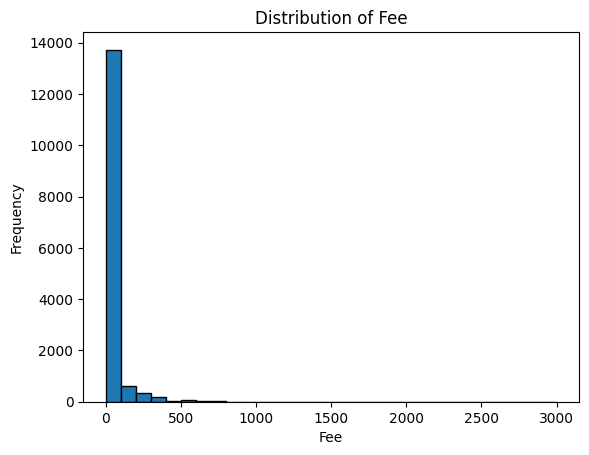

In [298]:

plt.hist(train['Fee'], bins=30, edgecolor='k')
plt.title('Distribution of Fee')
plt.xlabel('Fee')
plt.ylabel('Frequency')
plt.show()

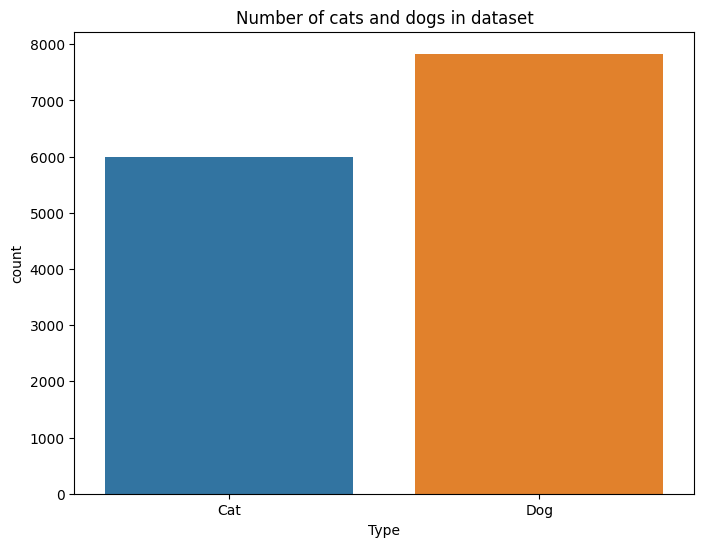

In [299]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Type', data=data, hue='Type')
plt.title('Number of cats and dogs in dataset')
plt.show()

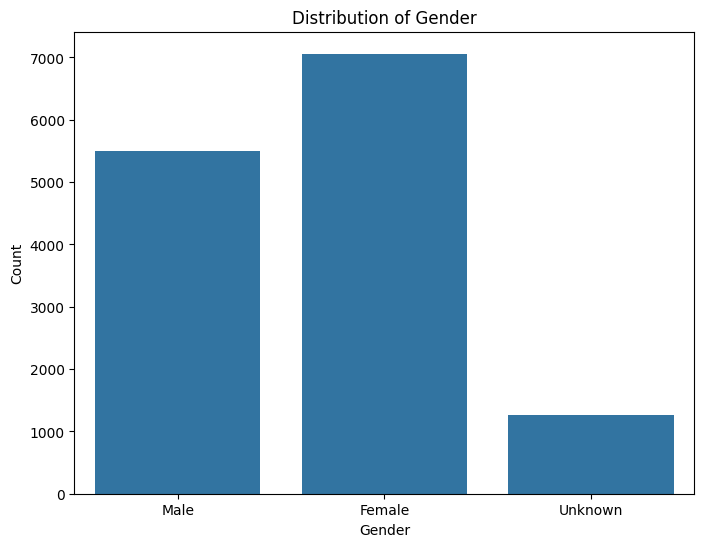

In [300]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=data)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2], labels=['Male', 'Female', 'Unknown'])
plt.show()

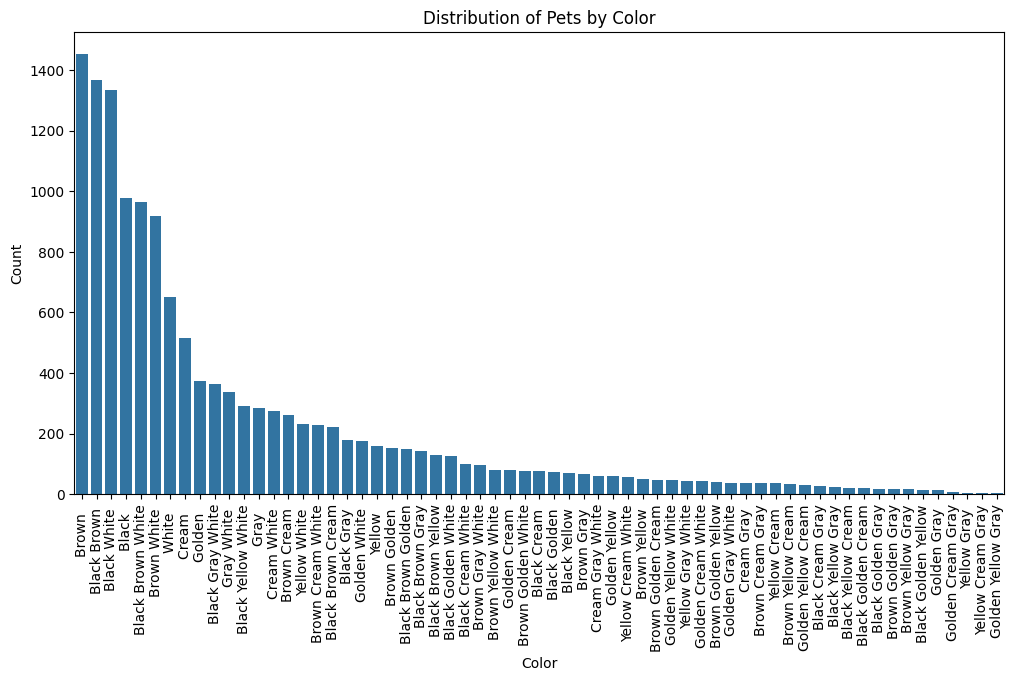

In [301]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Color', data=data, order=data['Color'].value_counts().index)
plt.title('Distribution of Pets by Color')
plt.xlabel('Color')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

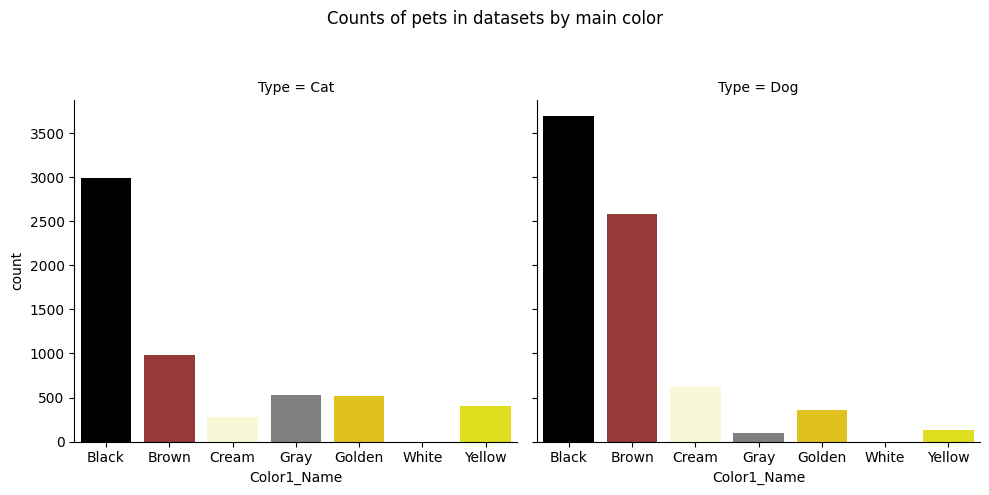

In [302]:
sns.catplot(x='Color1_Name', col='Type', data=data, kind='count', hue='Color1_Name', palette=['Black', 'Brown', '#FFFDD0', 'Gray', 'Gold', 'White', 'Yellow'])
plt.subplots_adjust(top=0.8)
plt.suptitle('Counts of pets in datasets by main color')
plt.show()

# Another preprocessing and feature engineering

In [5]:
import pandas as pd
import numpy as np
import os
from IPython.display import display, Image, HTML
import cv2
import joblib

data = pd.read_csv('input/cleaned_data.csv')

data.head()

,Type,Name,Age(months),Gender,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Fee,PetID,PhotoAmt,Breed1_Name,Color1_Name,Color,Breed,AgeGroup,FeeCategory,image_paths
0,Cat,Nibble,3,Male,Small,Short,No,No,No,Healthy,90,86e1089a3,1,Tabby,Black,Black White,Tabby,Kitten,Low,['input/images/86e1089a3-1.jpg']
1,Cat,Unknown,1,Male,Medium,Medium,Not Sure,Not Sure,Not Sure,Healthy,90,6296e909a,2,Domestic Medium Hair,Black,Black Brown,Domestic Medium Hair,Kitten,Low,"['input/images/6296e909a-1.jpg', 'input/images..."
2,Dog,Brisco,1,Male,Medium,Medium,Yes,Yes,No,Healthy,90,3422e4906,7,Mixed Breed,Brown,Brown White,Mixed Breed,Puppy,Low,"['input/images/3422e4906-1.jpg', 'input/images..."
3,Dog,Hunter,1,Male,Medium,Short,No,No,No,Healthy,170,850a43f90,3,Mixed Breed,Black,Black,Mixed Breed,Puppy,Low,"['input/images/850a43f90-1.jpg', 'input/images..."
4,Cat,Unknown,3,Female,Medium,Short,No,No,No,Healthy,530,d24c30b4b,2,Domestic Short Hair,Cream,Cream Gray,Domestic Short Hair,Kitten,Medium,"['input/images/d24c30b4b-1.jpg', 'input/images..."


In [6]:
for col in data.select_dtypes('object').columns:
    print(data[col].describe(), '\n')

count     9572
unique       2
top        Cat
freq      5195
Name: Type, dtype: object 

count        9572
unique       4683
top       Unknown
freq          864
Name: Name, dtype: object 

count       9572
unique         2
top       Female
freq        5268
Name: Gender, dtype: object 

count       9572
unique         4
top       Medium
freq        6184
Name: MaturitySize, dtype: object 

count      9572
unique        3
top       Short
freq       5495
Name: FurLength, dtype: object 

count     9572
unique       3
top        Yes
freq      4202
Name: Vaccinated, dtype: object 

count     9572
unique       3
top        Yes
freq      5885
Name: Dewormed, dtype: object 

count     9572
unique       3
top         No
freq      6030
Name: Sterilized, dtype: object 

count        9572
unique          3
top       Healthy
freq         9169
Name: Health, dtype: object 

count          9572
unique         9572
top       83432904d
freq              1
Name: PetID, dtype: object 

count                 

In [7]:
for col in data.select_dtypes('object').columns:
    print(data[col].value_counts(), '\n')

Type
Cat    5195
Dog    4377
Name: count, dtype: int64 

Name
Unknown    864
Baby        64
Lucky       55
Mimi        53
Brownie     47
          ... 
Mulan        1
Runo         1
Atuh         1
Yoki         1
Dawgie       1
Name: count, Length: 4683, dtype: int64 

Gender
Female    5268
Male      4304
Name: count, dtype: int64 

MaturitySize
Medium         6184
Small          2412
Large           948
Extra Large      28
Name: count, dtype: int64 

FurLength
Short     5495
Medium    3370
Long       707
Name: count, dtype: int64 

Vaccinated
Yes         4202
No          4104
Not Sure    1266
Name: count, dtype: int64 

Dewormed
Yes         5885
No          2522
Not Sure    1165
Name: count, dtype: int64 

Sterilized
No          6030
Yes         2376
Not Sure    1166
Name: count, dtype: int64 

Health
Healthy           9169
Minor Injury       380
Serious Injury      23
Name: count, dtype: int64 

PetID
83432904d    1
86e1089a3    1
6296e909a    1
3422e4906    1
7c4db8441    1
         

In [8]:
data.columns

Index(['Type', 'Name', 'Age(months)', 'Gender', 'MaturitySize', 'FurLength',
       'Vaccinated', 'Dewormed', 'Sterilized', 'Health', 'Fee', 'PetID',
       'PhotoAmt', 'Breed1_Name', 'Color1_Name', 'Color', 'Breed', 'AgeGroup',
       'FeeCategory', 'image_paths'],
      dtype='object')

In [9]:
# Define breed categories
high_demand_breeds = [
    'Bengal', 'Maine Coon', 'Ragdoll', 'Siamese', 'British Shorthair', 'Scottish Fold', 'Sphynx',
    'French Bulldog', 'Golden Retriever', 'Siberian Husky', 'Pomeranian', 'Akita', 'Samoyed'
]
popular_breeds = [
    'Domestic Short Hair', 'Domestic Long Hair', 'Bombay', 'Russian Blue',
    'Labrador Retriever', 'German Shepherd Dog', 'Beagle', 'Boxer', 'Dachshund'
]
common_breeds = [
    'Tabby', 'Calico', 'Tuxedo', 'American Shorthair', 'Mixed Breed', 'Jack Russell Terrier',
    'Border Collie', 'Pit Bull Terrier'
]

# Fee assignment function
def assign_fee(row):
    # Assign base fees based on breed
    if row['Breed1_Name'] in high_demand_breeds:
        fee = np.random.randint(500, 2000)
    elif row['Breed1_Name'] in popular_breeds:
        fee = np.random.randint(200, 800)
    elif row['Breed1_Name'] in common_breeds:
        fee = np.random.randint(50, 300)
    else:
        fee = np.random.randint(50, 300)  # Default for unknown breeds

    # Adjust fee based on age group
    if row['AgeGroup'] == 'Puppy/Kitten':
        fee += np.random.randint(50, 200)  # Higher fee for younger pets
    elif row['AgeGroup'] == 'Adult':
        fee += np.random.randint(0, 50)   # Slight increase for adults
    elif row['AgeGroup'] == 'Senior':
        fee -= np.random.randint(20, 150)  # Discount for seniors

    # Adjust fee based on health
    if row['Health'] == 'Minor Injury':
        fee -= np.random.randint(20, 50)
    elif row['Health'] == 'Serious Injury':
        fee -= np.random.randint(50, 150)

    # Ensure minimum fee is at least $20
    # return max(20, fee)

    return max(20, int(round(fee / 10) * 10))

# Apply the fee assignment function
data['Fee'] = data.apply(assign_fee, axis=1)
data['Fee'].sort_values().unique()

array([  20,   30,   40,   50,   60,   70,   80,   90,  100,  110,  120,
        130,  140,  150,  160,  170,  180,  190,  200,  210,  220,  230,
        240,  250,  260,  270,  280,  290,  300,  310,  320,  330,  340,
        350,  360,  370,  380,  390,  400,  410,  420,  430,  440,  450,
        460,  470,  480,  490,  500,  510,  520,  530,  540,  550,  560,
        570,  580,  590,  600,  610,  620,  630,  640,  650,  660,  670,
        680,  690,  700,  710,  720,  730,  740,  750,  760,  770,  780,
        790,  800,  810,  820,  830,  840,  850,  860,  880,  900,  910,
        920,  930,  940,  950,  960,  970,  990, 1000, 1010, 1020, 1030,
       1040, 1050, 1060, 1070, 1080, 1090, 1110, 1120, 1130, 1140, 1150,
       1160, 1170, 1180, 1190, 1200, 1210, 1220, 1230, 1240, 1250, 1260,
       1270, 1280, 1290, 1300, 1310, 1320, 1330, 1340, 1350, 1360, 1370,
       1380, 1390, 1400, 1420, 1430, 1440, 1460, 1470, 1480, 1490, 1500,
       1510, 1520, 1530, 1550, 1560, 1570, 1580, 15

In [10]:
# Define fee categories
def categorize_fee(fee):
    if fee <= 200:
        return 'Low'
    elif 200 <= fee <= 600:
        return 'Medium'
    elif 600 <= fee <= 1200:
        return 'High'
    else:
        return 'Premium'

# Apply the fee categorization function
data['FeeCategory'] = data['Fee'].apply(categorize_fee)

# Display the unique values in the new FeeCategory column
data['FeeCategory'].unique()

array(['Low', 'Medium', 'High', 'Premium'], dtype=object)

In [11]:
data['FeeCategory'].value_counts()

FeeCategory
Medium     4515
Low        3440
High       1359
Premium     258
Name: count, dtype: int64

In [12]:
data.isnull().sum()

Type            0
Name            0
Age(months)     0
Gender          0
MaturitySize    0
FurLength       0
Vaccinated      0
Dewormed        0
Sterilized      0
Health          0
Fee             0
PetID           0
PhotoAmt        0
Breed1_Name     0
Color1_Name     0
Color           0
Breed           0
AgeGroup        0
FeeCategory     0
image_paths     0
dtype: int64

In [13]:
ordered_cats = {
    'MaturitySize': ['Not Specified', 'Small', 'Medium', 'Large', 'Extra Large'],
    'FurLength': ['Short', 'Medium', 'Long'],
    'Health': ['Serious Injury', 'Minor Injury', 'Healthy'],
    'FeeCategory': ['Low', 'Medium', 'High', 'Premium']
}

In [14]:
for col in data: 
    if col in ['PhotoAmt']:
        data[col] = data[col].astype('int')
        
    if col in ['Type', 'Gender', 'Health', 'Breed1_Name', 'Breed', 'Color1_Name', 'Color', 'AgeGroup', 'Vaccinated', 'Dewormed', 'Sterilized']:
        data[col] = data[col].astype('category')
        
    if col in ordered_cats.keys():
        category = pd.CategoricalDtype(ordered_cats[col], ordered=True)
        data[col] = data[col].astype(category)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9572 entries, 0 to 9571
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Type          9572 non-null   category
 1   Name          9572 non-null   object  
 2   Age(months)   9572 non-null   int64   
 3   Gender        9572 non-null   category
 4   MaturitySize  9572 non-null   category
 5   FurLength     9572 non-null   category
 6   Vaccinated    9572 non-null   category
 7   Dewormed      9572 non-null   category
 8   Sterilized    9572 non-null   category
 9   Health        9572 non-null   category
 10  Fee           9572 non-null   int64   
 11  PetID         9572 non-null   object  
 12  PhotoAmt      9572 non-null   int64   
 13  Breed1_Name   9572 non-null   category
 14  Color1_Name   9572 non-null   category
 15  Color         9572 non-null   category
 16  Breed         9572 non-null   category
 17  AgeGroup      9572 non-null   category
 18  FeeCateg

In [15]:
# data.to_csv('cleaned_data.csv', index=False, encoding='utf-8')

# Modeling

In [6]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

features = ['Type', 'Age(months)', 'Gender', 'MaturitySize', 'FurLength', 'Color1_Name', 'Fee']

# Preprocessing pipeline
numeric_features = ['Age(months)', 'Fee']
categorical_features = ['Type', 'Gender', 'MaturitySize', 'FurLength', 'Color1_Name']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Preprocess the data
X_preprocessed = preprocessor.fit_transform(data[features])

X_preprocessed

array([[-0.49797681, -0.85820774,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.59652207, -0.85820774,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.59652207, -0.85820774,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.25161367, -0.42791607,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.14256735, -0.1631212 ,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.83238415, -0.79200902,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [7]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Define user preferences (example)
user_preferences = {
    'Type': 'Cat',
    'Age(months)': 2,
    'Gender': 'Female',
    'MaturitySize': 'Small',
    'FurLength': 'Short',
    # 'FeeCategory': 'Medium',
    'Color1_Name': 'White',
    'Fee': 1100
}

# Convert user preferences to a feature vector
user_input = pd.DataFrame([user_preferences])
user_input_encoded = preprocessor.transform(user_input)

# Compute similarity scores
similarity_scores = cosine_similarity(user_input_encoded, X_preprocessed)

# Rank pets by similarity
data['Similarity'] = similarity_scores[0]
recommended_pets = data.sort_values('Similarity', ascending=False)
recommended_pets = recommended_pets[recommended_pets['Similarity'] > 0.8].head(5)

print(recommended_pets[['Breed1_Name', 'Name', 'Type', 'Gender', 'Age(months)', 'Color', 'Fee']])


              Breed1_Name        Name Type  Gender  Age(months)    Color  Fee
3100              Siamese     Siamese  Cat  Female            2  White    890
8777              Siamese    Snowball  Cat  Female            2  White    790
7503  Domestic Short Hair  Snow White  Cat  Female            3  White    770
6384  Domestic Short Hair        Merc  Cat  Female            1  White    720
1332  Domestic Short Hair        Lulu  Cat  Female            2  White    710


In [8]:
def is_image_clear(image_path, threshold=100):
    """
    Check if an image is clear based on the Laplacian variance method.

    Args:
        image_path (str): Path to the image file.
        threshold (float): Sharpness threshold. Lower values indicate blurry images.

    Returns:
        bool: True if the image is clear, False if it's blurry.
    """
    if not os.path.exists(image_path):
        return False

    # Read the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        return False

    # Calculate the Laplacian variance
    laplacian_var = cv2.Laplacian(image, cv2.CV_64F).var()
    return laplacian_var > threshold

Recommended Pets (Images)
**Siamese** - Siamese (Similarity: 0.99)


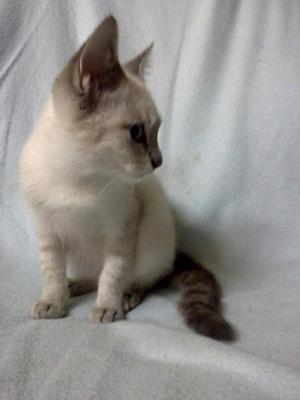

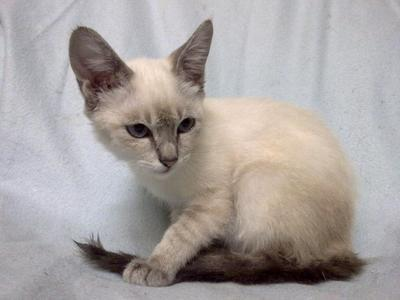

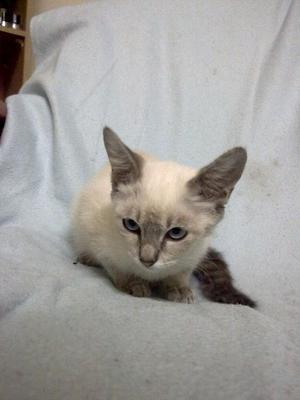

--------------------------------------------------------------------------------------------------------------------------------------------
**Snowball** - Siamese (Similarity: 0.97)


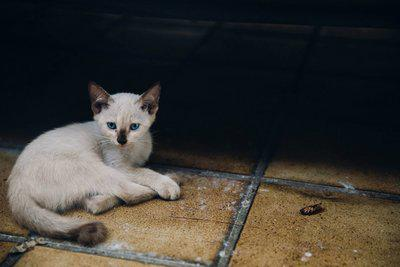

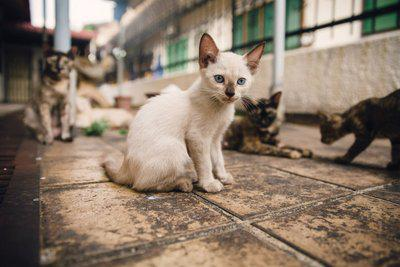

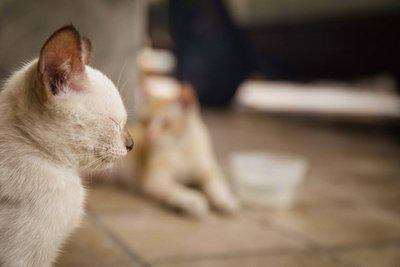

--------------------------------------------------------------------------------------------------------------------------------------------
**Snow White** - Domestic Short Hair (Similarity: 0.96)


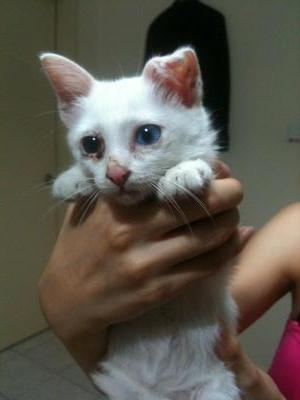

--------------------------------------------------------------------------------------------------------------------------------------------
**Merc** - Domestic Short Hair (Similarity: 0.94)


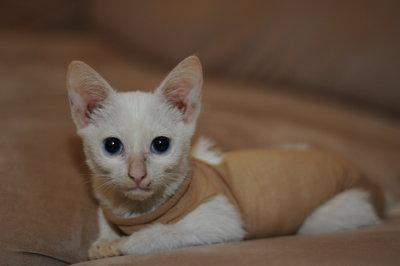

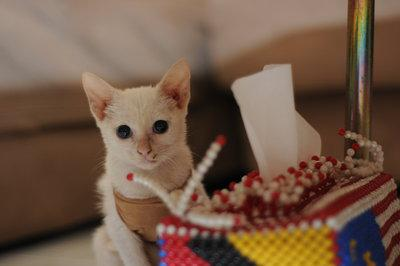

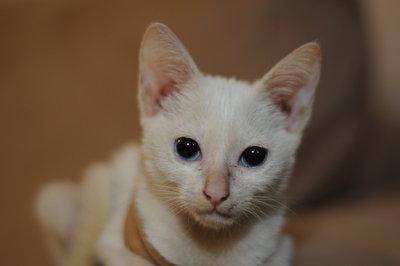

--------------------------------------------------------------------------------------------------------------------------------------------
**Lulu** - Domestic Short Hair (Similarity: 0.94)


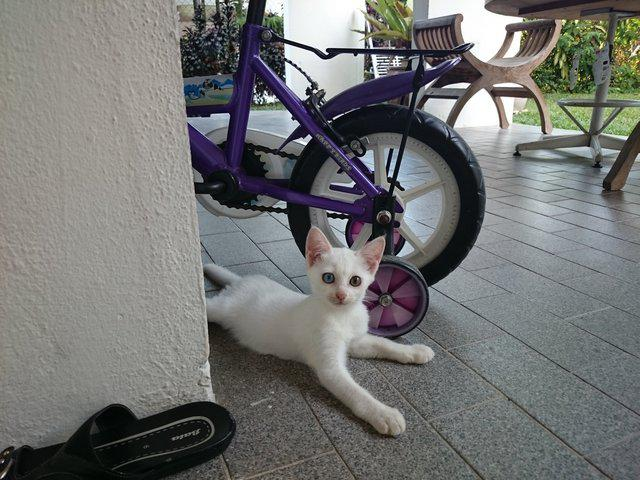

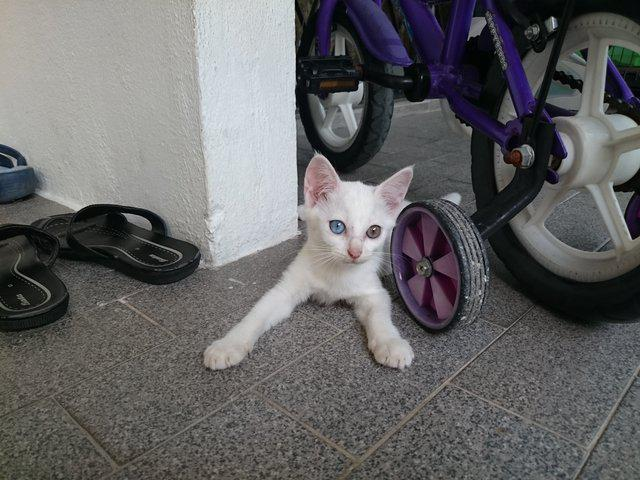

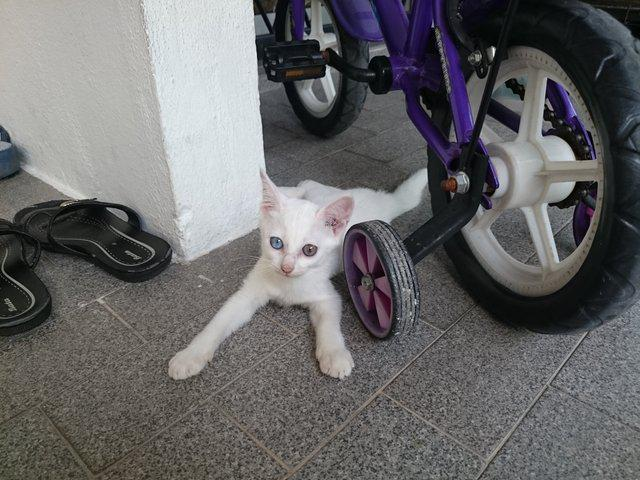

--------------------------------------------------------------------------------------------------------------------------------------------


In [9]:
# Displaying recommended pets
print("Recommended Pets (Images)")
for _, pet in recommended_pets.iterrows():
    print(f"**{pet['Name']}** - {pet['Breed1_Name']} (Similarity: {pet['Similarity']:.2f})")

    # Check if 'image_paths' exists and is a valid string
    if isinstance(pet['image_paths'], str):
        image_paths = pet['image_paths'].strip("[]").replace("'", "").split(", ")
        image_paths = image_paths[:3]  # Limit to 3 images per pet for display
        
        # Display images if paths exist
        for image_path in image_paths:
            image_path = os.path.abspath(image_path)
            if os.path.exists(image_path):
                display(Image(image_path, width=200))  # Display image
            else:
                print(f"Image not found: {image_path}")

    print("-" * 140)  # Separator for each pet